In [51]:
# Import our dependencies
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold

In [2]:
# Correcting the Time set in the Time of Max Wind Gust column in the weather file first, then import dataset
weather_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/weather.csv', encoding='latin-1')
price_demand_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/price_and_demand.csv', encoding='latin-1')

In [3]:
# Checking any missing values per column and per rows
def data_checking(weather):
    # Identify NaN or empty values
    missing_values = weather.isna().sum()

    # Identify incorrect value types
    incorrect_types = weather.apply(lambda x: pd.to_numeric(x, errors='coerce').isna().sum())

    # Combine the results into a DataFrame
    cleaning_report = pd.DataFrame({'Missing Values': missing_values, 'Incorrect Types': incorrect_types})

    return cleaning_report

### Processing Weather file

In [4]:
data_checking (weather_df_original)

,Missing Values,Incorrect Types
Location,0,175
Date,0,175
Minimum temperature (°C),0,0
Maximum temperature (°C),1,1
Rainfall (mm),0,0
Evaporation (mm),175,175
Sunshine (hours),175,175
Direction of maximum wind gust,1,175
Speed of maximum wind gust (km/h),1,1
Time of maximum wind gust,1,175


In [5]:
# Create copies of the dataframes to avoid modifying them
weather_df = weather_df_original.copy(deep=True)
price_demand_df = price_demand_df_original.copy(deep=True)

In [6]:
# Drop off all empty columns
weather_df = weather_df.dropna(axis=1, how='all')

# Drop off all rows that have more than 4 missing values
weather_df = weather_df.dropna(thresh=len(weather_df.columns)-4)

weather_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36:00,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33:00,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07:00,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50:00,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58:00,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"Melbourne (Olympic Park), Victoria",19/04/2023,14.4,17.5,1.2,SW,28.0,11:32:00,14.8,66,WSW,9,1022.0,15.8,53.0,SSW,9.0,1022.1
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47:00,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48:00,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,SSW,22.0,16:09:00,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [7]:
# check the data types
weather_df.dtypes

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object

In [8]:
#replace blank strings in this column with nan
print(' ' in weather_df['9am wind direction'].values)
weather_df['9am wind direction'] = weather_df['9am wind direction'].replace(r'^\s*$',np.nan,regex = True)


True


In [9]:
#impute the categorical data 
imp_most_frequent = SimpleImputer(strategy="most_frequent")
weather_df['9am wind direction'] = imp_most_frequent.fit_transform(weather_df[['9am wind direction']])

#checking the values again
print(' ' in weather_df['9am wind direction'].values)

False


In [10]:
#Change the wind directions to compass degrees so the data becomes numeric

directions_dict={'N':0, 'NNE':22.5,"NE":45,"ENE":67.5, 'E':90,'ESE':112.5, 'SE':135,'SSE':157.5, 'S':180,'SSW':202.5, 'SW':225,'WSW':247.5, 'W':270,'WNW':292.5,'NW':315,'NNW':337.5}
weather_df=weather_df.replace({"Direction of maximum wind gust ": directions_dict,'9am wind direction': directions_dict, '3pm wind direction':directions_dict})

#Add compass degrees to headers where needed
weather_df.rename(columns={'Direction of maximum wind gust ': 'Direction of maximum wind gust (compass °)', '9am wind direction': '9am wind direction (compass °)', '3pm wind direction': '3pm wind direction (compass °)'}, inplace=True)

weather_df.head()

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust (compass °),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction (compass °),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction (compass °),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,225.0,44.0,11:36:00,12.0,64,315.0,13,991.3,13.2,59.0,292.5,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,202.5,43.0,11:33:00,11.0,65,270.0,9,1006.7,15.1,54.0,202.5,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,202.5,31.0,8:07:00,11.5,70,202.5,9,1019.2,13.8,67.0,202.5,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,180.0,24.0,14:50:00,12.3,84,247.5,6,1028.1,16.9,56.0,225.0,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,0.0,31.0,11:58:00,14.0,78,0.0,9,1026.3,18.8,65.0,225.0,11.0,1023.2


In [11]:
# Replace 'calm' with 0
weather_df['9am wind speed (km/h)'] = weather_df['9am wind speed (km/h)'].replace('Calm', 0.0, inplace=False)

# Convert the Date column to datetime64
weather_df['Date'] = pd.to_datetime(weather_df['Date'], dayfirst=True)

# Set the Time of maximum wind gust column to numeric:
weather_df['Time of maximum wind gust'] = pd.to_timedelta(weather_df['Time of maximum wind gust'].apply(lambda x: x.zfill(5)))

# Convert the 9am wind speed column to numeric:
weather_df['9am wind speed (km/h)'] = pd.to_numeric(weather_df['9am wind speed (km/h)'])

weather_df.dtypes

Location                                               object
Date                                           datetime64[ns]
Minimum temperature (°C)                              float64
Maximum temperature (°C)                              float64
Rainfall (mm)                                         float64
Direction of maximum wind gust (compass °)            float64
Speed of maximum wind gust (km/h)                     float64
Time of maximum wind gust                     timedelta64[ns]
9am Temperature (°C)                                  float64
9am relative humidity (%)                               int64
9am wind direction (compass °)                        float64
9am wind speed (km/h)                                 float64
9am MSL pressure (hPa)                                float64
3pm Temperature (°C)                                  float64
3pm relative humidity (%)                             float64
3pm wind direction (compass °)                        float64
3pm wind

In [12]:
data_checking (weather_df)

,Missing Values,Incorrect Types
Location,0,174
Date,0,0
Minimum temperature (°C),0,0
Maximum temperature (°C),0,0
Rainfall (mm),0,0
Direction of maximum wind gust (compass °),0,0
Speed of maximum wind gust (km/h),0,0
Time of maximum wind gust,0,0
9am Temperature (°C),0,0
9am relative humidity (%),0,0


### Processing Price and Demand file

In [13]:
data_checking (price_demand_df)

,Missing Values,Incorrect Types
VIC1,0,8351
1/11/2022 0:30,0,8351
4178.18,0,0
8.94,0,0
TRADE,0,8351


In [14]:
# Checking data type and shape of dataframe
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VIC1            8351 non-null   object 
 1   1/11/2022 0:30  8351 non-null   object 
 2   4178.18         8351 non-null   float64
 3   8.94            8351 non-null   float64
 4   TRADE           8351 non-null   object 
dtypes: float64(2), object(3)
memory usage: 326.3+ KB


In [15]:
# Adding headers for price_demand_df:
header = ["State", "Date_Time", "Demand", "Price", "Trading_Status"]
price_demand_df.columns = header
price_demand_df

,State,Date_Time,Demand,Price,Trading_Status
0,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
1,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
2,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
3,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
4,VIC1,1/11/2022 3:00,3919.59,1.04,TRADE
...,...,...,...,...,...
8346,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8347,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8348,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8349,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [16]:
# Convert the Date_Time column from object type to datetime type
price_demand_df['Date_Time'] = pd.to_datetime(price_demand_df['Date_Time'], dayfirst=True)

In [17]:
# Drop off any irrelevant columns
price_demand_df = price_demand_df[['Date_Time', 'Demand', 'Price']]
price_demand_df.head()

,Date_Time,Demand,Price
0,2022-11-01 01:00:00,4086.02,0.14
1,2022-11-01 01:30:00,4033.37,0.02
2,2022-11-01 02:00:00,3985.64,0.00
3,2022-11-01 02:30:00,3885.64,0.02
4,2022-11-01 03:00:00,3919.59,1.04


In [18]:
# rechecking the dataframe information and type
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  8351 non-null   datetime64[ns]
 1   Demand     8351 non-null   float64       
 2   Price      8351 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 195.9 KB


In [19]:
# Split the Date_Time column into separate Date and Time columns
price_demand_df['Date'] = pd.to_datetime(((price_demand_df['Date_Time']).dt.date), dayfirst=True)
price_demand_df['Time'] = pd.to_datetime(price_demand_df['Date_Time'].dt.strftime('%H:%M:%S')).dt.time

# Rearrange all the columns, remove the Time column because it is redundant
price_demand_df = price_demand_df[['Date', 'Demand', 'Price']]

#the total daily demand
price_demand_df = price_demand_df.groupby(['Date']).agg({"Demand":"sum", "Price":"mean"}).reset_index()
price_demand_df.head()

C:\Users\John Paul\AppData\Local\Temp\ipykernel_16968\3162551046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_demand_df['Date'] = pd.to_datetime(((price_demand_df['Date_Time']).dt.date), dayfirst=True)


,Date,Demand,Price
0,2022-11-01,203251.28,-4.038696
1,2022-11-02,233630.93,-2.515208
2,2022-11-03,235672.34,63.209167
3,2022-11-04,224895.28,110.939167
4,2022-11-05,189190.35,72.962500


In [20]:
# Joining two datasets: energy consumption and weather
daily_weather_energy_df = pd.merge(weather_df, price_demand_df, on='Date', how='inner')
daily_weather_energy_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust (compass °),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction (compass °),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction (compass °),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Price
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,225.0,44.0,0 days 11:36:00,12.0,64,315.0,13.0,991.3,13.2,59.0,292.5,11.0,991.5,203251.28,-4.038696
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,202.5,43.0,0 days 11:33:00,11.0,65,270.0,9.0,1006.7,15.1,54.0,202.5,13.0,1008.4,233630.93,-2.515208
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,202.5,31.0,0 days 08:07:00,11.5,70,202.5,9.0,1019.2,13.8,67.0,202.5,9.0,1021.3,235672.34,63.209167
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,180.0,24.0,0 days 14:50:00,12.3,84,247.5,6.0,1028.1,16.9,56.0,225.0,9.0,1026.6,224895.28,110.939167
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,0.0,31.0,0 days 11:58:00,14.0,78,0.0,9.0,1026.3,18.8,65.0,225.0,11.0,1023.2,189190.35,72.962500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"Melbourne (Olympic Park), Victoria",2023-04-19,14.4,17.5,1.2,225.0,28.0,0 days 11:32:00,14.8,66,247.5,9.0,1022.0,15.8,53.0,202.5,9.0,1022.1,220897.61,102.333958
170,"Melbourne (Olympic Park), Victoria",2023-04-20,7.8,18.5,0.0,202.5,17.0,0 days 12:47:00,12.4,72,22.5,7.0,1026.8,17.5,58.0,225.0,4.0,1025.5,227925.10,130.707500
171,"Melbourne (Olympic Park), Victoria",2023-04-21,11.3,19.0,0.0,202.5,13.0,0 days 10:48:00,14.8,78,45.0,6.0,1030.5,18.6,64.0,157.5,2.0,1029.2,232043.13,131.461042
172,"Melbourne (Olympic Park), Victoria",2023-04-22,14.6,19.2,0.0,202.5,22.0,0 days 16:09:00,15.2,84,225.0,6.0,1031.9,18.8,64.0,202.5,11.0,1029.7,207431.82,80.391458


In [21]:
#Drop off the location of the dataset as all the data is from the same location
#Drop off Price as it's not independent, it's dependent on Demand
daily_weather_energy_df = daily_weather_energy_df.drop(['Location', 'Price'], axis=1)

# Drop any rows with missing values (if needed)
daily_weather_energy_df = daily_weather_energy_df.dropna()
daily_weather_energy_df

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust (compass °),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction (compass °),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction (compass °),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand
0,2022-11-01,8.5,13.3,3.0,225.0,44.0,0 days 11:36:00,12.0,64,315.0,13.0,991.3,13.2,59.0,292.5,11.0,991.5,203251.28
1,2022-11-02,6.9,15.7,2.8,202.5,43.0,0 days 11:33:00,11.0,65,270.0,9.0,1006.7,15.1,54.0,202.5,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,202.5,31.0,0 days 08:07:00,11.5,70,202.5,9.0,1019.2,13.8,67.0,202.5,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,180.0,24.0,0 days 14:50:00,12.3,84,247.5,6.0,1028.1,16.9,56.0,225.0,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,0.0,31.0,0 days 11:58:00,14.0,78,0.0,9.0,1026.3,18.8,65.0,225.0,11.0,1023.2,189190.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2023-04-19,14.4,17.5,1.2,225.0,28.0,0 days 11:32:00,14.8,66,247.5,9.0,1022.0,15.8,53.0,202.5,9.0,1022.1,220897.61
170,2023-04-20,7.8,18.5,0.0,202.5,17.0,0 days 12:47:00,12.4,72,22.5,7.0,1026.8,17.5,58.0,225.0,4.0,1025.5,227925.10
171,2023-04-21,11.3,19.0,0.0,202.5,13.0,0 days 10:48:00,14.8,78,45.0,6.0,1030.5,18.6,64.0,157.5,2.0,1029.2,232043.13
172,2023-04-22,14.6,19.2,0.0,202.5,22.0,0 days 16:09:00,15.2,84,225.0,6.0,1031.9,18.8,64.0,202.5,11.0,1029.7,207431.82


### *Checking correlation*


In [22]:
#Change data type of "Time of maximum wind gust," converted to minutes to use in correlation plots
daily_weather_energy_df['Time of maximum wind gust'] = daily_weather_energy_df['Time of maximum wind gust'] / pd.Timedelta(minutes=1)

# Checking the data types of the columns
daily_weather_energy_df.dtypes

Date                                          datetime64[ns]
Minimum temperature (°C)                             float64
Maximum temperature (°C)                             float64
Rainfall (mm)                                        float64
Direction of maximum wind gust (compass °)           float64
Speed of maximum wind gust (km/h)                    float64
Time of maximum wind gust                            float64
9am Temperature (°C)                                 float64
9am relative humidity (%)                              int64
9am wind direction (compass °)                       float64
9am wind speed (km/h)                                float64
9am MSL pressure (hPa)                               float64
3pm Temperature (°C)                                 float64
3pm relative humidity (%)                            float64
3pm wind direction (compass °)                       float64
3pm wind speed (km/h)                                float64
3pm MSL pressure (hPa)  

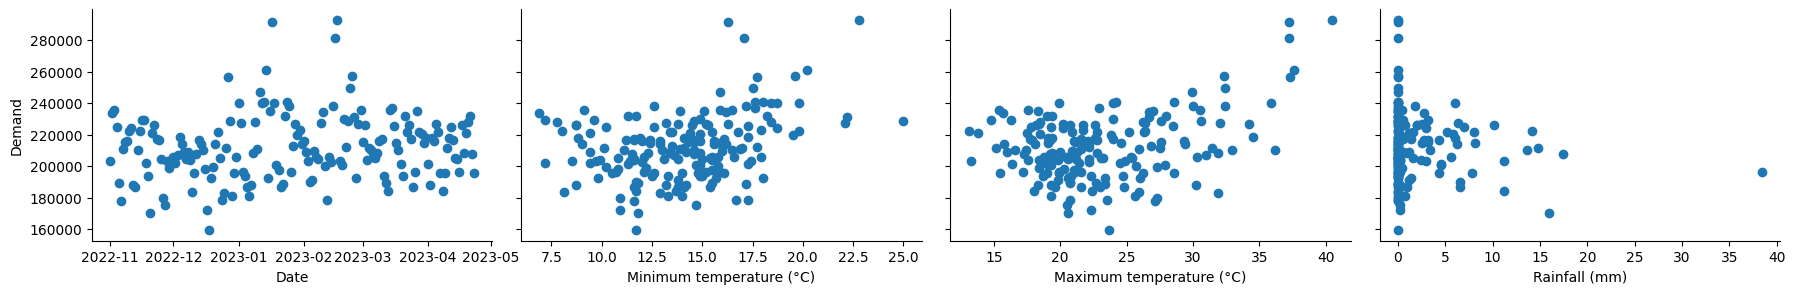

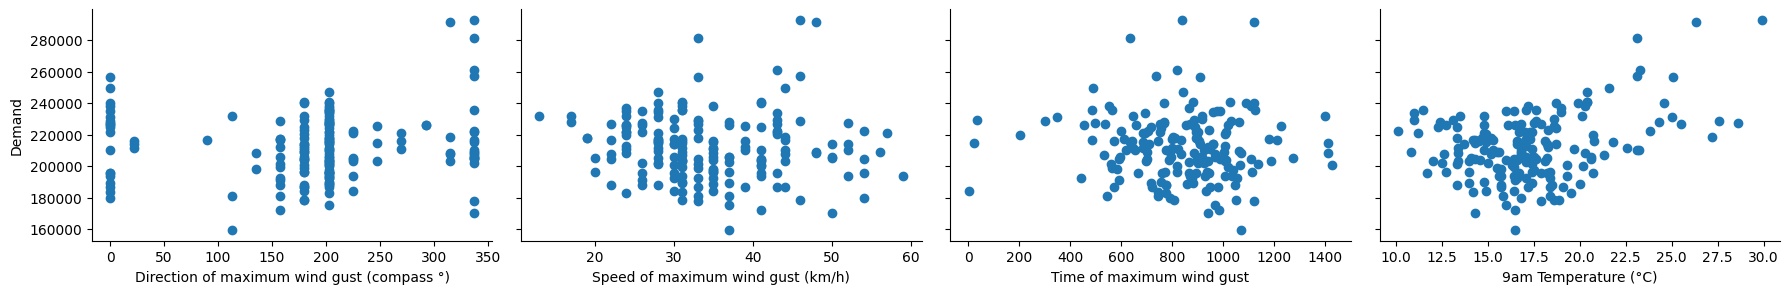

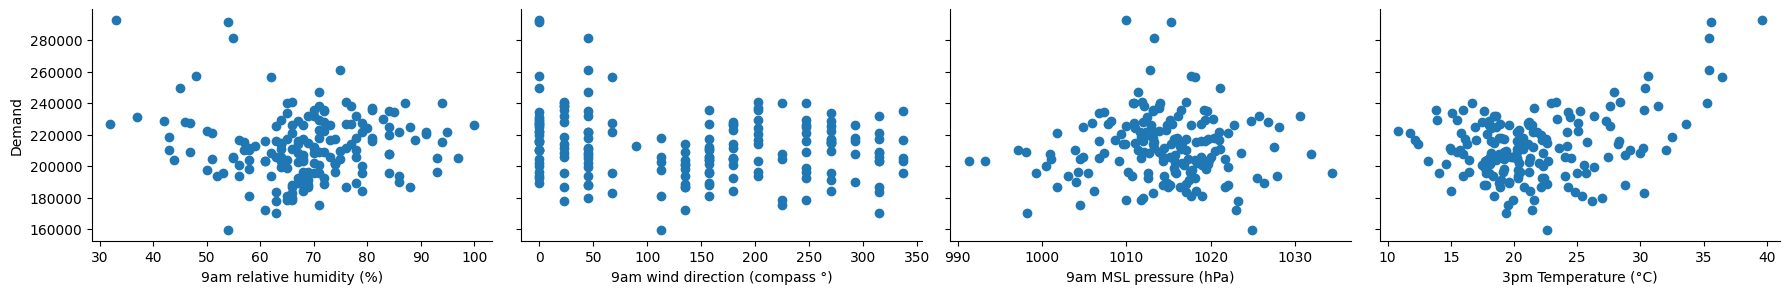

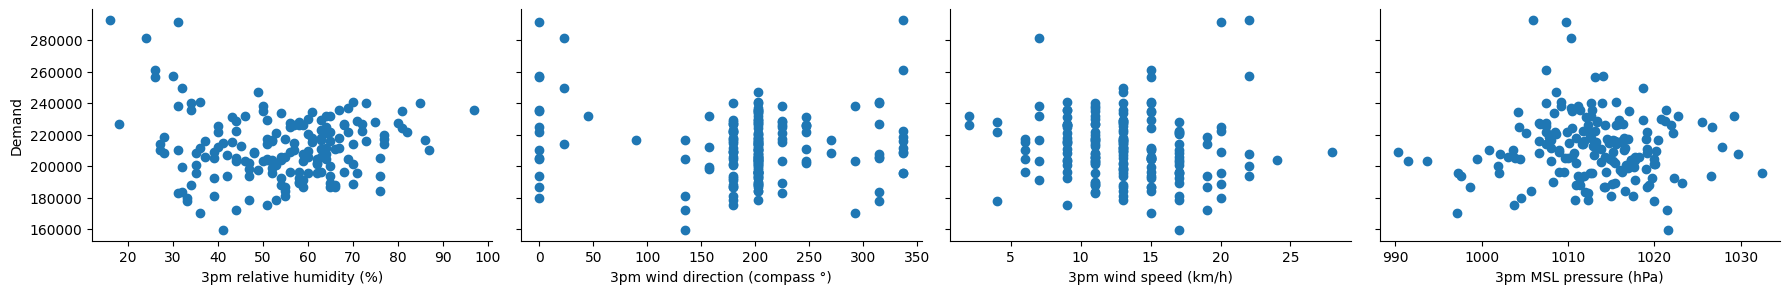

In [23]:
# Features grouped by category for correlation scatter plots
weather_features = [
    ['Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)'],
    ['Direction of maximum wind gust (compass °)', 'Speed of maximum wind gust (km/h)', 'Time of maximum wind gust', '9am Temperature (°C)'],
    ['9am relative humidity (%)', '9am wind direction (compass °)', '9am MSL pressure (hPa)', '3pm Temperature (°C)'],
    ['3pm relative humidity (%)', '3pm wind direction (compass °)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']
]

# Create scatter plots for each group of features
for feature_group in weather_features:
    pair_grid = sns.PairGrid(daily_weather_energy_df, height=3, aspect=1.5, y_vars='Demand', x_vars=feature_group)
    pair_grid.map(plt.scatter)

plt.show()


In [24]:
#Locating the high outlier in rainfall 
daily_weather_energy_df.loc[daily_weather_energy_df['Rainfall (mm)'].idxmax()]

Date                                          2023-04-16 00:00:00
Minimum temperature (°C)                                     12.1
Maximum temperature (°C)                                     17.2
Rainfall (mm)                                                38.4
Direction of maximum wind gust (compass °)                  202.5
Speed of maximum wind gust (km/h)                            35.0
Time of maximum wind gust                                   773.0
9am Temperature (°C)                                         12.7
9am relative humidity (%)                                      93
9am wind direction (compass °)                              247.5
9am wind speed (km/h)                                         9.0
9am MSL pressure (hPa)                                     1004.3
3pm Temperature (°C)                                         16.4
3pm relative humidity (%)                                    68.0
3pm wind direction (compass °)                              202.5
3pm wind s

In [25]:
#Imputing it to the mean of the column
daily_weather_energy_df['Rainfall (mm)'] = daily_weather_energy_df['Rainfall (mm)'].replace(38.4,np.nan)

imp_mean = SimpleImputer(strategy="mean")
daily_weather_energy_df['Rainfall (mm)'] = imp_mean.fit_transform(daily_weather_energy_df[['Rainfall (mm)']])

#checking the new scatterplot
sns.PairGrid(daily_weather_energy_df, height=3, aspect=1.5, y_vars='Demand', x_vars=['Rainfall (mm)']).map(plt.scatter)
plt.show()

In [26]:
# Calculate the Pearson's correlation metric for all variables (except Date) against Demand
daily_weather_energy = daily_weather_energy_df.drop(columns=['Date'])   
correlations = daily_weather_energy.corrwith(daily_weather_energy['Demand']).sort_values(key=abs)
print(f"Pearson's correlation for all variables vs Demand: \n{correlations}")

Pearson's correlation for all variables vs Demand: 
9am MSL pressure (hPa)                        0.012934
3pm MSL pressure (hPa)                       -0.018447
9am wind speed (km/h)                         0.020679
9am relative humidity (%)                    -0.047605
Speed of maximum wind gust (km/h)            -0.059182
Time of maximum wind gust                    -0.062124
Rainfall (mm)                                -0.064197
3pm relative humidity (%)                    -0.065690
Direction of maximum wind gust (compass °)    0.083736
3pm wind speed (km/h)                        -0.089362
3pm wind direction (compass °)               -0.091559
9am wind direction (compass °)               -0.195098
Minimum temperature (°C)                      0.344513
3pm Temperature (°C)                          0.355698
9am Temperature (°C)                          0.360563
Maximum temperature (°C)                      0.369480
Demand                                        1.000000
dtype: float6

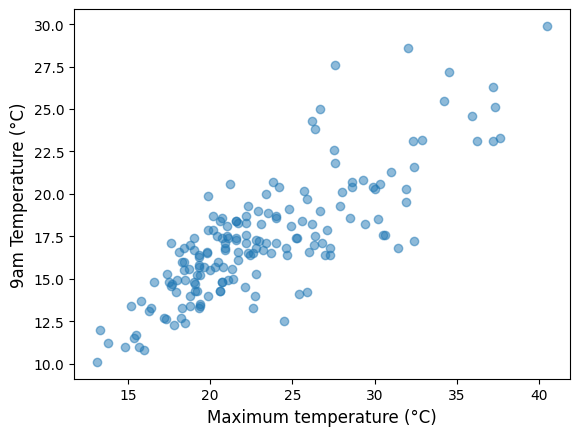

Pearson correlation of Maximum temperature (°C) and 9am Temperature (°C):


0.8059054261472441

In [29]:
#visualising why we won't use multiple temperature measures together as they would not be independent from each other (for multiple regression)
plt.scatter(x=daily_weather_energy_df['Maximum temperature (°C)'], y=daily_weather_energy_df['9am Temperature (°C)'], alpha=0.5)
plt.xlabel('Maximum temperature (°C)', fontsize=12)
plt.ylabel('9am Temperature (°C)', fontsize=12)
plt.show()

#their pearson correlation with each other, shows highly correlated
print("Pearson correlation of Maximum temperature (°C) and 9am Temperature (°C):")
daily_weather_energy_df['Maximum temperature (°C)'].corr(daily_weather_energy_df['9am Temperature (°C)'])


In [32]:
#looking at correlation of other variables with Maximum temperature, before use in multiple regression 
print("Pearson's correlation for all variables vs Maximum temperature:")
daily_weather_energy_df.corrwith(daily_weather_energy_df['Maximum temperature (°C)']).sort_values(key=abs)

Pearson's correlation for all variables vs Maximum temperature:


9am MSL pressure (hPa)                        0.003719
Time of maximum wind gust                    -0.015394
3pm wind speed (km/h)                         0.039839
3pm wind direction (compass °)               -0.045573
9am wind speed (km/h)                        -0.046376
Speed of maximum wind gust (km/h)             0.049710
Direction of maximum wind gust (compass °)   -0.104574
3pm MSL pressure (hPa)                       -0.157008
9am relative humidity (%)                    -0.301264
Rainfall (mm)                                -0.337381
Demand                                        0.369480
Minimum temperature (°C)                      0.516981
9am wind direction (compass °)               -0.558837
3pm relative humidity (%)                    -0.648110
9am Temperature (°C)                          0.805905
3pm Temperature (°C)                          0.966331
Maximum temperature (°C)                      1.000000
dtype: float64

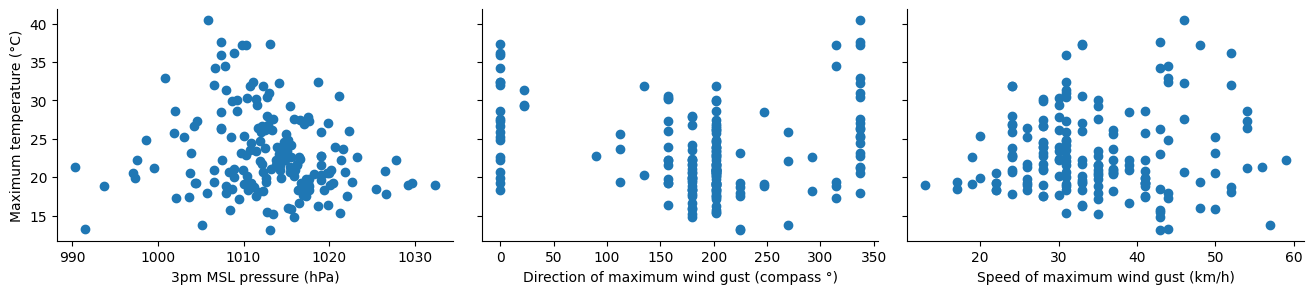

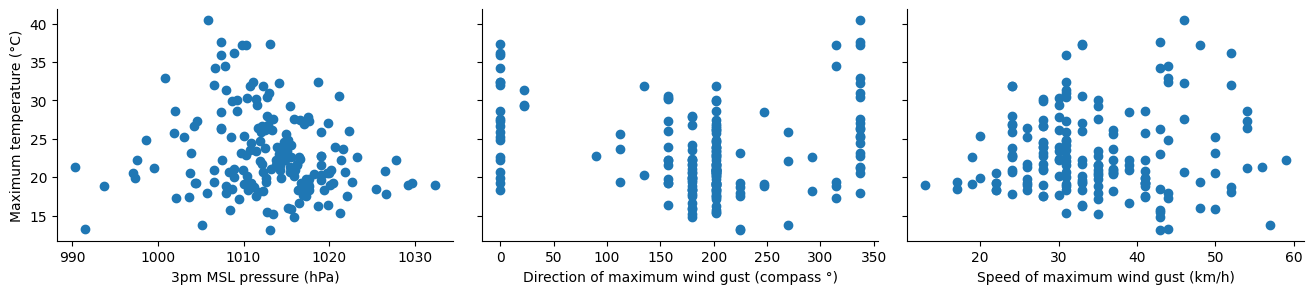

In [34]:
#Visualing other variables vs Maximum temperature, choosing ones that have less than a .3 pearson correlation
sns.PairGrid(daily_weather_energy_df, height=3, aspect=1.5, y_vars='Maximum temperature (°C)', x_vars=['3pm MSL pressure (hPa)', 'Direction of maximum wind gust (compass °)', 'Speed of maximum wind gust (km/h)']).map(plt.scatter)
plt.show()

In [45]:
#testing correlation of these variables to each other
#3pm pressure and Speed of Maximum wind gust are too correlated to use together 
hpa_windgust_direction = daily_weather_energy_df['3pm MSL pressure (hPa)'].corr(daily_weather_energy_df['Direction of maximum wind gust (compass °)'], method='pearson')
print(f"Pearson correlation of '3pm MSL pressure (hPa)' and 'Direction of maximum wind gust (compass °)': {hpa_windgust_direction}\n")

hpa_windgust_speed = daily_weather_energy_df['3pm MSL pressure (hPa)'].corr(daily_weather_energy_df['Speed of maximum wind gust (km/h)'], method='pearson')
print(f"Pearson correlation of '3pm MSL pressure (hPa)' and 'Speed of maximum wind gust (km/h)': {hpa_windgust_speed}\n")

direct_wind_speed_windgust = daily_weather_energy_df['Direction of maximum wind gust (compass °)'].corr(daily_weather_energy_df['Speed of maximum wind gust (km/h)'], method='pearson')
print(f"Pearson correlation of 'Direction of maximum wind gust (compass °)' and 'Speed of maximum wind gust (km/h)': {direct_wind_speed_windgust}")

Pearson correlation of '3pm MSL pressure (hPa)' and 'Direction of maximum wind gust (compass °)': -0.08070515404146197

Pearson correlation of '3pm MSL pressure (hPa)' and 'Speed of maximum wind gust (km/h)': -0.5151689304551603

Pearson correlation of 'Direction of maximum wind gust (compass °)' and 'Speed of maximum wind gust (km/h)': 0.06866547642845494


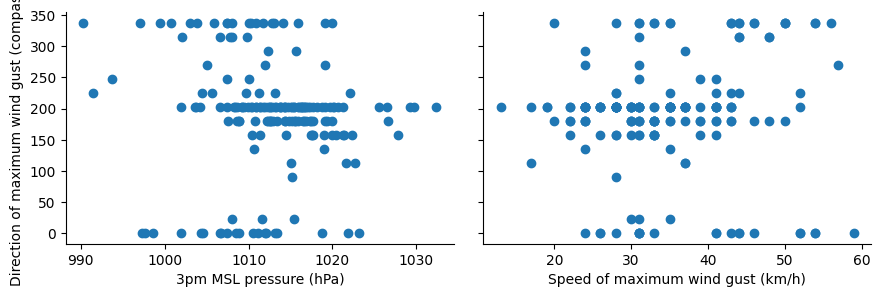

In [46]:
#visualize the correlation of these feature variables which can be used in testing
sns.PairGrid(daily_weather_energy_df, height=3, aspect=1.5, y_vars='Direction of maximum wind gust (compass °)', x_vars=['3pm MSL pressure (hPa)','Speed of maximum wind gust (km/h)']).map(plt.scatter)
plt.show()

### *Which Model will be used*
We use Regresssion Model because our target value is maximum daily energy usage and it is a continuous (numerical) value

In [53]:
# Instantiate
linear_model = LinearRegression()

# Create a function to test the model:
def test_model(model, data):
    X_train, X_test, y_train, y_test = data
    reg = model.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
    plt.title('Training data')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend(loc='upper left')
    plt.plot([0, 50], [0, 50], c='red')
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, c='green', marker='x', label='Test data')
    plt.title('Test data')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend(loc='upper left')
    plt.plot([0, 50], [0, 50], c='red')
    
    print('actual MEDV values of the first 5 test data:')
    print(y_test[0:5])
    print('')
    print('predicted MEDV values of the first 5 test data:')
    print(y_test_pred[0:5])
    print('')

    print(f'Model: {type(reg).__name__}')
    print(f'Train RMSE: {mean_squared_error(y_train, y_train_pred, squared=False):.2f}')
    print(f'Train MAE: {mean_absolute_error(y_train, y_train_pred):.2f}')
    print(f'Train R2: {r2_score(y_train, y_train_pred):.2f}\n')

    print(f'Test RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.2f}')
    print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
    print(f'Test R2: {r2_score(y_test, y_test_pred):.2f}\n')

    print(f'Train score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}\n')
    print(f'***************************************\n')
    

### *Model 1: multiple regression*
variables: 'Maximum temperature (°C)', '3pm MSL pressure (hPa)', 'Direction of maximum wind gust (compass °)'

In [54]:
#Test and plot our regression model test vs train data

X = daily_weather_energy_df[['Maximum temperature (°C)', '3pm MSL pressure (hPa)', 'Direction of maximum wind gust (compass °)']]
y = daily_weather_energy_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Scaling
# Fit the StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)

#test the model
model1_data = [X_train_ss, X_test_ss, y_train, y_test]
test_model(linear_model, model1_data)

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[212773.452641   208677.67324663 217786.5905189  209039.29001149
 203283.11051167]

Model: LinearRegression
Train RMSE: 18177.57
Train MAE: 14663.53
Train R2: 0.11

Test RMSE: 23115.77
Test MAE: 18637.59
Test R2: 0.22

Train score: 0.1091468031349686
Test Score: 0.22137205783333092

***************************************



### *Model 2: multiple regression*
variables: 'Maximum temperature (°C)', 'Speed of maximum wind gust (km/h)', 'Direction of maximum wind gust (compass °)'


In [55]:
#Test and plot  our regression model test vs train data

X = daily_weather_energy_df[['Maximum temperature (°C)', 'Speed of maximum wind gust (km/h)', 'Direction of maximum wind gust (compass °)']]
y = daily_weather_energy_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Scaling
# Fit the StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)

#test the model
model2_data = [X_train_ss, X_test_ss, y_train, y_test]
test_model(linear_model, model2_data)

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[213131.03151912 209167.20972539 218257.83402758 207922.71699072
 203220.00090913]

Model: LinearRegression
Train RMSE: 18157.92
Train MAE: 14613.29
Train R2: 0.11

Test RMSE: 22978.50
Test MAE: 18450.50
Test R2: 0.23

Train score: 0.11107156939055529
Test Score: 0.2305921796435052

***************************************



### *Model 3: multiple regression*
variables: 'Maximum temperature (°C)', '3pm MSL pressure (hPa)'


In [56]:
#Test and plot  our regression model test vs train data

X = daily_weather_energy_df[['Maximum temperature (°C)', '3pm MSL pressure (hPa)']]
y = daily_weather_energy_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Scaling
# Fit the StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)

#test the model
model3_data = [X_train_ss, X_test_ss, y_train, y_test]
test_model(linear_model, model3_data)

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[215307.79349397 208574.01907388 217320.77705087 209216.75922624
 203265.80339445]

Model: LinearRegression
Train RMSE: 18223.25
Train MAE: 14571.71
Train R2: 0.10

Test RMSE: 23540.17
Test MAE: 18864.05
Test R2: 0.19

Train score: 0.104664137766593
Test Score: 0.1925188443618051

***************************************



### *Model 4: multiple regression*
variables: 'Maximum temperature (°C)', 'Direction of maximum wind gust (compass °)'


In [57]:
#Test and plot  our regression model test vs train data

X = daily_weather_energy_df[['Maximum temperature (°C)', 'Direction of maximum wind gust (compass °)']]
y = daily_weather_energy_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Scaling
# Fit the StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)

#test the model
model4_data = [X_train_ss, X_test_ss, y_train, y_test]
test_model(linear_model, model4_data)

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[212822.23665897 208816.9199385  217606.94504728 209101.40672585
 203037.17740122]

Model: LinearRegression
Train RMSE: 18179.42
Train MAE: 14670.86
Train R2: 0.11

Test RMSE: 23164.13
Test MAE: 18628.02
Test R2: 0.22

Train score: 0.1089655111186495
Test Score: 0.2181109143630895

***************************************



### *Model 5: simple linear regression*
variable: 'Maximum temperature (°C)'

In [58]:
#Assigning chosen variable for simple linear regression
#Test and plot  our regression model test vs train data

X = daily_weather_energy_df[['Maximum temperature (°C)']]
y = daily_weather_energy_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Scaling
# Fit the StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)

#test the model
model5_data = [X_train_ss, X_test_ss, y_train, y_test]
test_model(linear_model, model5_data)

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[215324.69455018 208678.80821526 217190.20650384 209261.78070078
 203082.27235428]

Model: LinearRegression
Train RMSE: 18224.27
Train MAE: 14575.44
Train R2: 0.10

Test RMSE: 23569.82
Test MAE: 18855.16
Test R2: 0.19

Train score: 0.10456329385471985
Test Score: 0.19048391831215272

***************************************



##### Model 2 seems to give a better result in the train and test score

### *Back to Model 2, more testing*

In [59]:
#Test the Minmax scaled version to compare
X = daily_weather_energy_df[['Maximum temperature (°C)', 'Speed of maximum wind gust (km/h)', 'Direction of maximum wind gust (compass °)']]
y = daily_weather_energy_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Scaling
# Create a MinMaxScaler object
scaler_mm = MinMaxScaler().fit(X_train)
X_train_mm = scaler_mm.transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

#test the model
model2_mm_data = [X_train_mm, X_test_mm, y_train, y_test]
test_model(linear_model, model2_mm_data)

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[213131.03151912 209167.20972539 218257.83402758 207922.71699072
 203220.00090913]

Model: LinearRegression
Train RMSE: 18157.92
Train MAE: 14613.29
Train R2: 0.11

Test RMSE: 22978.50
Test MAE: 18450.50
Test R2: 0.23

Train score: 0.11107156939055529
Test Score: 0.2305921796435053

***************************************



The result between MinMaxScaler and StandardScaler was not much different

#### **Using KFold to examine Model 2 further:**

In [60]:
##explain what negative r2 values mean in sklearn

##the features
data= daily_weather_energy_df[['Maximum temperature (°C)', 'Speed of maximum wind gust (km/h)', 'Direction of maximum wind gust (compass °)']]

##the class labels
classlabel=daily_weather_energy_df["Demand"]

k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
r2_test_score = []
for train_index, test_index in kf.split(data):
    #Perform the split for this fold
    X_train, X_test = data.iloc[train_index, :], data.iloc[test_index, :]
    y_train, y_test = classlabel[train_index], classlabel[test_index]

    #Scale the data
    scaler = StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    
    #Train regression model
    #knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    linear_model.fit(X_train, y_train)

    #Predict result
    y_pred=linear_model.predict(X_test)
    r2_score(y_test, y_pred)
    r2_test_score.append(r2_score(y_test, y_pred))

#show each r2 score    
print(f'R2 scores: {r2_test_score}')
#show average of r2 scores
avg_r2_score = sum(r2_test_score)/k
print(f'Average r2 score:{avg_r2_score}')

R2 scores: [-0.09840619125636674, 0.052431706628107144, 0.2285442530078846, -0.05160510530684648, -0.43039143612355635, -0.05248395791495253, 0.1518179752082781, 0.19732736034328757, 0.1019435049320303, 0.2453180704643858]
Average r2 score:0.03444961799822514


#### **Using KFold to examine Model 1 further: how does it compare to Model 2?**

In [61]:
#(MODEL 1, NEXT HIGHEST R2 SCORE)

#the features
data= daily_weather_energy_df[['Maximum temperature (°C)', '3pm MSL pressure (hPa)', 'Direction of maximum wind gust (compass °)']]

#the class labels
classlabel=daily_weather_energy_df["Demand"]

k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
r2_test_score = []
for train_index, test_index in kf.split(data):
    #Perform the split for this fold
    X_train, X_test = data.iloc[train_index, :], data.iloc[test_index, :]
    y_train, y_test = classlabel[train_index], classlabel[test_index]

    #Scale the data
    scaler = StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #Train regression model
    linear_model.fit(X_train, y_train)

    #Predict result
    y_pred=linear_model.predict(X_test)
    r2_score(y_test, y_pred)
    r2_test_score.append(r2_score(y_test, y_pred))

#show each r2 score    
print(f'R2 scores: {r2_test_score}')
#show average of r2 scores
avg_r2_score = sum(r2_test_score)/k
print(f'Average r2 score:{avg_r2_score}')

R2 scores: [-0.14518382372918914, 0.007152663566971307, 0.25932652945251233, -0.02335231053011544, -0.45992078039299833, -0.13747682231158898, 0.19173691105408852, 0.20066751780926295, 0.15801897478029803, 0.23254883045128705]
Average r2 score:0.02835176901505283


### *Residual Analysis of Model 2 features*
examine for: linearity, independence, equal variance


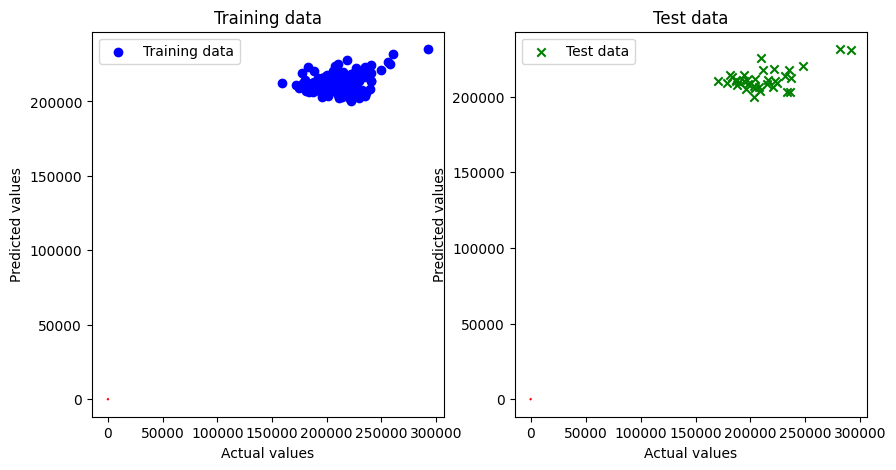

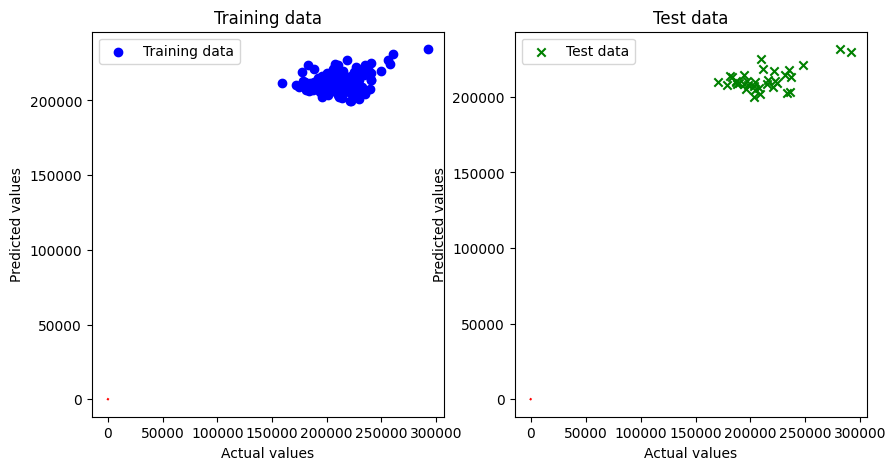

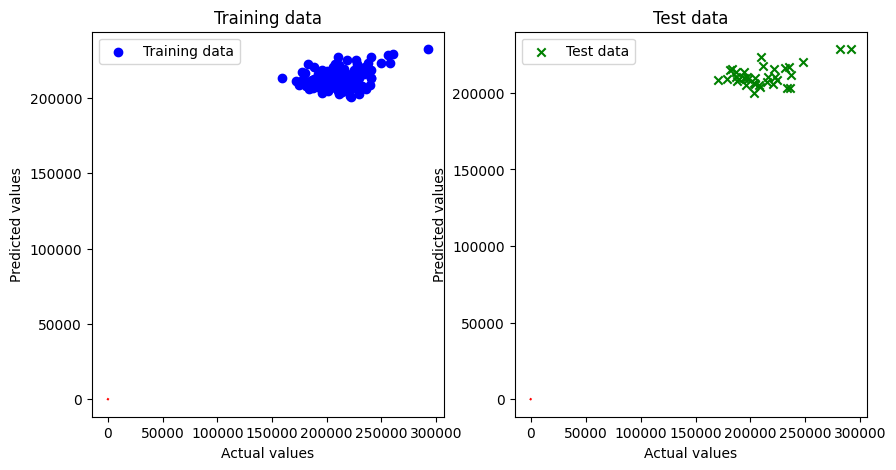

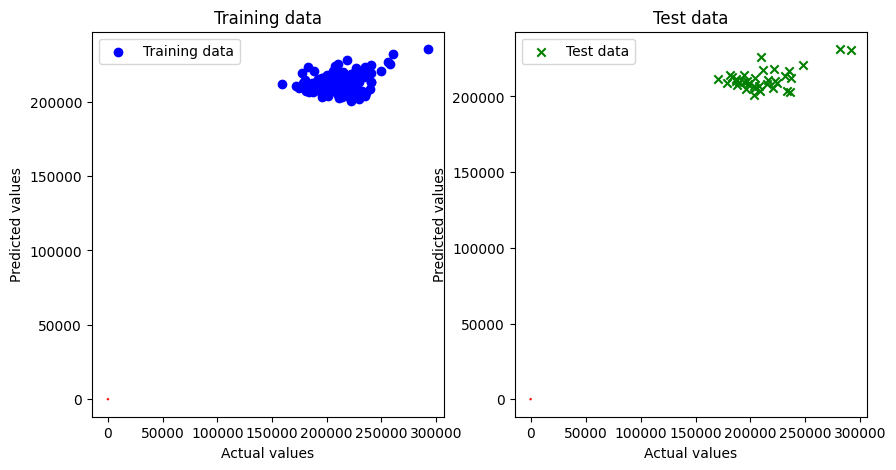

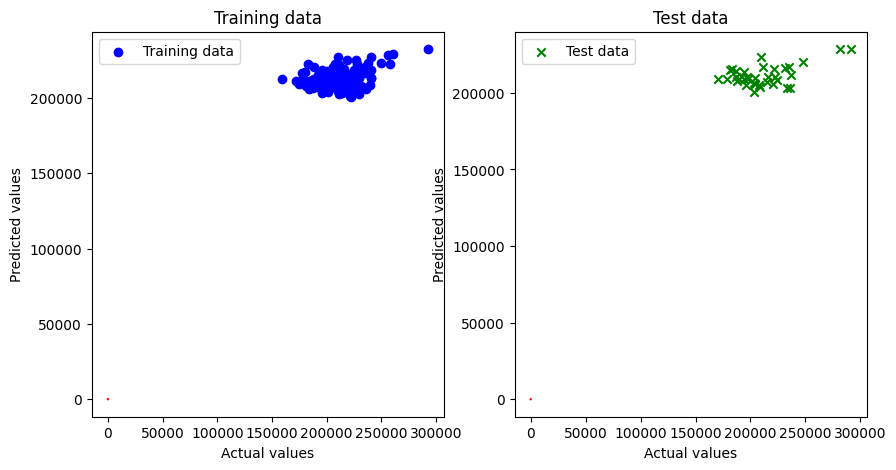

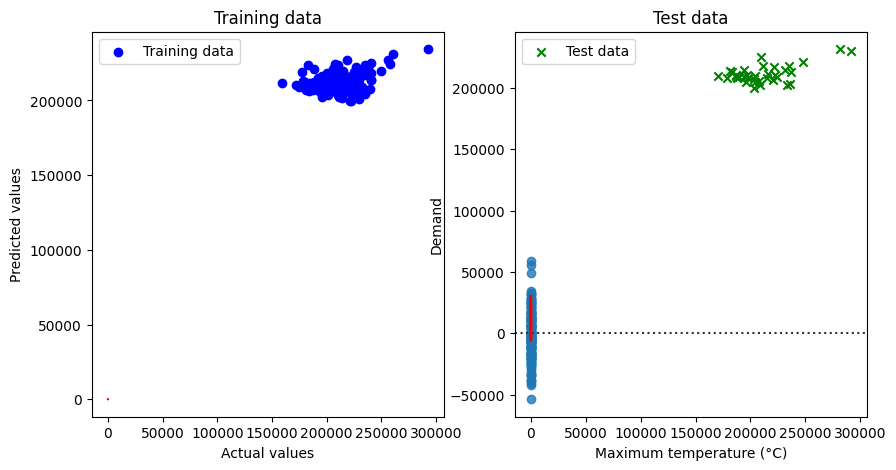

In [62]:
#using sns to better visualise residuals with fit line
#shows a non-linear relationship 
#possibly not independent
sns.residplot(x=daily_weather_energy_df['Maximum temperature (°C)'], y=daily_weather_energy_df['Demand'], lowess=True, line_kws=dict(color="r"))
plt.show()

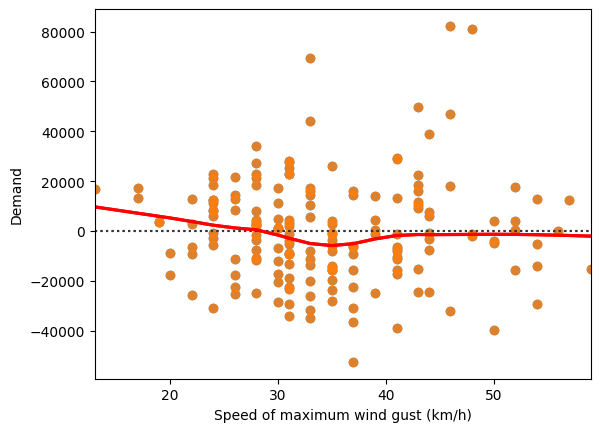

In [64]:
#possibly not showing equal variance
sns.residplot(x=daily_weather_energy_df['Speed of maximum wind gust (km/h)'], y=daily_weather_energy_df['Demand'], lowess=True, line_kws=dict(color="r"))
plt.show()

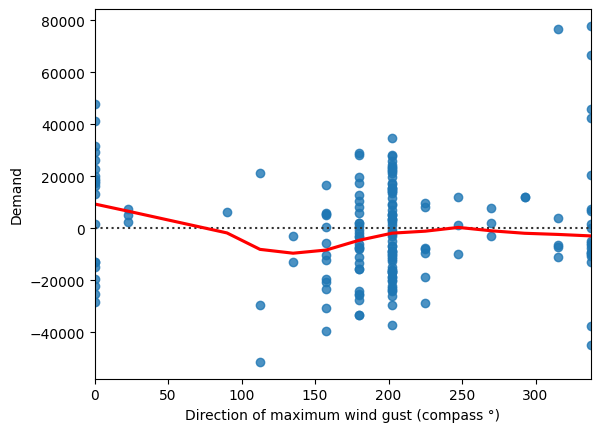

In [65]:
#doesn't show equal variance
sns.residplot(x=daily_weather_energy_df['Direction of maximum wind gust (compass °)'], y=daily_weather_energy_df['Demand'], lowess=True, line_kws=dict(color="r"))
plt.show()

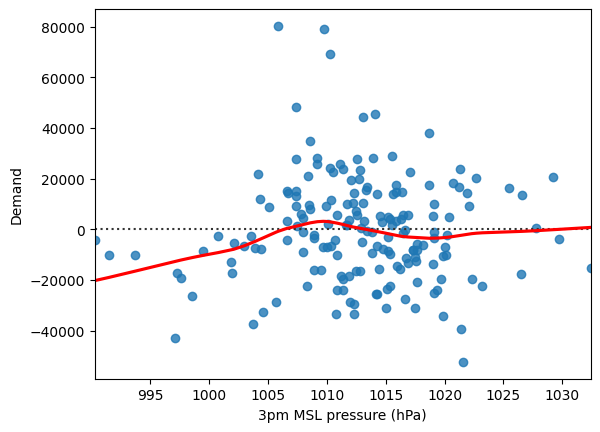

In [66]:
#used in one of the test models but not the one with highest score
sns.residplot(x=daily_weather_energy_df['3pm MSL pressure (hPa)'], y=daily_weather_energy_df['Demand'], lowess=True, line_kws=dict(color="r"))
plt.show()

In [74]:
# Predicting:
pred = linear_model.predict(X_test)
pred = pd.DataFrame(pred, columns=['Predicted'])
pred['Actual'] = y_test.values
pred

,Predicted,Actual
0,198262.883049,222500.17
1,198762.907786,221336.77
2,212063.931805,205399.43
3,221058.142085,247335.97
4,236058.109796,260914.15
5,216864.493695,212778.11
6,207601.043175,215819.45
7,210594.507013,204410.94
8,213362.852160,199908.82
9,207821.158651,178602.78


In [75]:
result = linear_model.score(X_test, y_test)
print (result)

0.23254883045128705


#### Research-- other methods

[0.1355922  0.18056701 0.01884437 0.02399251 0.04474555 0.04069695
 0.0635837  0.0528279  0.02278481 0.03398736 0.04239917 0.2054193
 0.05266098 0.01847487 0.02910987 0.03431346]


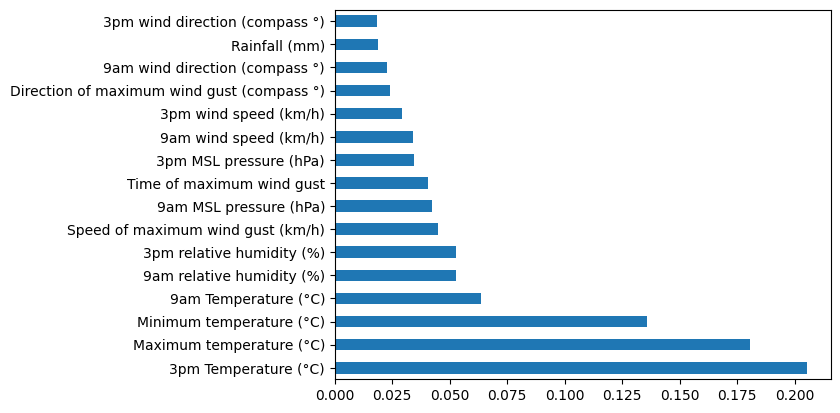

In [67]:
# Split our preprocessed data into our features and target arrays
y_bargraph = daily_weather_energy_df["Demand"]

#Drop the Date column due to data type for next comparison, and cannot see obvious pattern in its correlation plot 
#temporarily drop wind direction, gives error until wind column fixed...
X_bargraph = daily_weather_energy_df.drop(["Demand", "Date"], axis=1)

# Checking which feature is important to the target:
important_feature = RandomForestRegressor(random_state=42)
important_feature.fit(X_bargraph,y_bargraph)
print(important_feature.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(important_feature.feature_importances_, index=X_bargraph.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [68]:
# Testing different models
# Split the preprocessed data into a training and testing dataset
X_train_research, X_test_research, y_train_research, y_test_research = train_test_split(X_bargraph, y_bargraph, train_size=0.8, random_state=43) 
# Create a StandardScaler instances
scaler_research = StandardScaler()

# Fit the StandardScaler
X_scaler_research = scaler_research.fit(X_train_research)

# Scale the data
X_train_scaled_research = X_scaler_research.transform(X_train_research)
X_test_scaled_research = X_scaler_research.transform(X_test_research)

data = X_train_scaled_research, X_test_scaled_research, y_train_research, y_test_research

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(GradientBoostingRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)
test_model(ExtraTreesRegressor(), data)

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[208656.752 221293.552 205706.158 201427.03  206988.148]

Model: KNeighborsRegressor
Train RMSE: 14626.48
Train MAE: 11962.85
Train R2: 0.42

Test RMSE: 22323.22
Test MAE: 16240.82
Test R2: 0.27

Train score: 0.4232147542481719
Test Score: 0.27384912272577444

***************************************

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[206268.0098 227767.79   213536.6627 204995.6833 215957.8191]

Model: RandomForestRegressor
Train RMSE: 6147.94
Train MAE: 4905.46
Train R2: 0.90

Test RMSE: 20612.01
Test MAE: 15920.74
Test R2: 0.38

Train score: 0.8980953160876548
Test Score: 0.38091022154427656

****************

Based on the outcome, the GradientBoostingRegressor and ExtraTreesRegressor models had a better performance with a lower RMSE values and a higher R2 value in both training and testing purpose